In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('./input/train.csv')
df_init = df.copy(deep=True)
#df = pd.read_csv('./input/test.csv')

In [4]:
data_cols = [col for col in df.columns if col != 'label']
df_data = df[data_cols]
df_target = df.label

In [5]:
print(len(df_data.columns))
drop_list = []
for col in df_data.columns:
    l = df_data[col].unique()
    if len(l) == 1:
        drop_list.append(col)
        
df_data = df_data.drop(drop_list, axis=1)
print(len(df_data.columns))

784
708


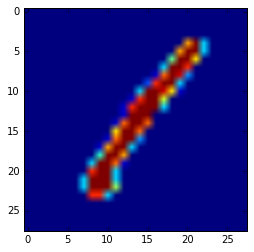

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
X = df_init[data_cols]
X.head()
plt.imshow((X.iloc[0].values / 16).astype(int).reshape(28, 28))

In [78]:
X_batch = X.iloc[:2000]
X_batch.shape

(2000, 784)

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
n_batch = 42000
X_batch = X.iloc[:n_batch]
y = df_init['label']
y_batch = y.iloc[:n_batch]

clf = RandomForestClassifier(n_estimators=80)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_batch, y_batch, test_size=0.4)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

def binarize(x):
    arr = x.values.reshape(28, 28)
    eroded_square = ndimage.binary_erosion(arr)
    reconstruction = ndimage.binary_propagation(eroded_square, mask=arr)
    return pd.Series(reconstruction.astype(int).ravel())

X_batch = X_batch.apply(lambda x: binarize(x), axis=1)
clf = RandomForestClassifier(n_estimators=80)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_batch, y_batch, test_size=0.4)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.96369047619
0.961904761905


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
clf = RandomForestClassifier(n_estimators=80)
y = df_init['label']
y_batch = y.iloc[:2000]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_batch, y_batch, test_size=0.33)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.89242424242424245

C:\Users\oracle\Anaconda3\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\oracle\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(20, 784)


0    687
1     97
Name: 0, dtype: int64

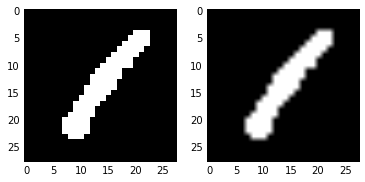

In [59]:
from scipy import misc
from scipy import ndimage
X_batch = X.iloc[:20]
print(X_batch.shape)
arr = X.iloc[0].values.reshape(28, 28)
plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.imshow(arr, cmap=plt.cm.gray, interpolation='nearest') 
eroded_square = ndimage.binary_erosion(arr)
reconstruction = ndimage.binary_propagation(eroded_square, mask=arr)
plt.subplot(1, 2, 2)
plt.imshow(reconstruction, cmap=plt.cm.gray)
X.iloc[0] = reconstruction.astype(int).ravel()

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation


def rf(df_):
    clf = RandomForestClassifier(n_estimators=60)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(df_, df_target, test_size=0.4)
    clf.fit(X_train, y_train)    
    return clf, clf.score(X_test, y_test)

_, sc = rf(df_data)
print('no scale', sc)
_, sc_scale = rf(df_data / 255)
print('with scale', sc_scale)

no scale 0.958273809524
with scale 0.958035714286


Selected values: learning_rate = 0.05, n_estimators = 80

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

n_trees = np.arange(30, 70, 10)
for n in n_trees:
    clf = RandomForestClassifier(n_estimators=n)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(df_data, df_target, test_size=0.4)
    clf.fit(X_train, y_train)    
    print(n, clf.score(X_test, y_test))

In [ ]:
from sklearn import neighbors
from sklearn import cross_validation 
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
X_train, X_test, y_train, y_test = cross_validation.train_test_split(df_data, df_target, test_size=0.4)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

In [ ]:
clf = RandomForestClassifier(n_estimators=60)
clf.fit(df_data, df_target)

In [ ]:
df_test = pd.read_csv('./input/test.csv')
res = clf.predict(df_test)
print(res)

In [ ]:
df_test['ImageId'] = np.arange(1, 28001)
df_test['Label'] = res
df_test.head()
df_test[['ImageId', 'Label']].to_csv('./submission/submission.csv', index=False)